
```
heart,SVM,NeuralNets
```

Домашнее задание
Каждый студент получает 3 файла train_датасет.npy, test_датасет_open.npy, test_датасет_closed.npy. Каждый файл содержит словарь с признаками, один из признаков - Class. Также каждый студент получает 2 классификатора из списка (kNN, LogReg, SVM, NeuralNetworks). Задание состоит в подборе параметров классификаторов на обучающей выборке и проверке качества на тестовой выборке. Дополнительные баллы можно получить за хорошие результаты

Требуется.

1. Выполнить подбор параметров моделей на обучающем датасете. Оценить качество модели с помощью метода кросс-валидации

2. Попробовать улучшить модель. Для улучшения можно использовать следующие методы:
- Нормализация данных
- Подбор гиперпараметров моделей
- Уменьшение размерности данных
- Другие методы

Каждый раз проверять качество с помощью кросс-валидации

3. Сделать выводы, какие методы улучшения работают, какие нет. Посчитать accuracy лучших моделей на открытом датасете.

4. На полученных моделях построить ROC кривые для открытого тестового множества. Сравнить полученные модели между собой. Какая лучше работает, сделать предположение почему. Для построения ROC кривой для числа классов больше, чем 2, воспользуйтесь [многоклассовый ROC](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) и методом predict_proba

Результат выполнения задания
- jupyter ноутбук Task2_Фамилия выполненными пунктами 1-4.
- файлы Task2_Фамилия_алгоритм1.npy Task2_Фамилия_Имя_алгоритм2.npy с результатами классификации на закрытом тесте, где алгоритм1 - ваш первый метод, алгоритм2 - ваш второй метод

Оценка за задание.
- Пункты 1-4 выполнены, результаты accuracy не выше бейзлайнов для каждого метода - 2.
- Пункты 1-4 выполнены, и хотя бы один результат выше бейзлайна - 2,5.
- Пункты 1-4 выполнены, и хотя бы один результат лучший среди всех работ для данного метода для данного датасета - 2,5 + 1 экстра балл.
- Пункты 1-4 выполнены, и хотя бы один результат лучший среди всех работ для данного датасета - 2,5 + 2 экстра балла.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load datasets
train_data = np.load("train_heart.npy", allow_pickle=True).item()
test_open_data = np.load("test_heart_open.npy", allow_pickle=True).item()
test_closed_data = np.load("test_heart_closed.npy", allow_pickle=True).item()

train_data = pd.DataFrame(train_data)
test_open_data = pd.DataFrame(test_open_data)
test_closed_data = pd.DataFrame(test_closed_data)

In [ ]:
# Prepare data
X_train = np.column_stack([train_data[col].values for col in train_data.columns[:-1]])
y_train = train_data['Class'].values

X_test_open = np.column_stack([test_open_data[col].values for col in test_open_data.columns[:-1]])
y_test_open = test_open_data['Class'].values

X_test_closed = np.column_stack([test_closed_data[col].values for col in test_closed_data.columns])

In [ ]:
# Step 1: Select model parameters on the training dataset and assess model quality using cross-validation
print("Step 1: Select model parameters on the training dataset and assess model quality using cross-validation")

# SVM
svm = SVC()
svm_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
print(f"SVM cross-validation scores: {svm_scores}")
print(f"SVM average cross-validation score: {svm_scores.mean():.2f}")

# Neural Network
nn = MLPClassifier()
nn_scores = cross_val_score(nn, X_train, y_train, cv=5, scoring='accuracy')
print(f"Neural Network cross-validation scores: {nn_scores}")
print(f"Neural Network average cross-validation score: {nn_scores.mean():.2f}")

Step 1: Select model parameters on the training dataset and assess model quality using cross-validation
SVM cross-validation scores: [0.575 0.675 0.725 0.55  0.65 ]
SVM average cross-validation score: 0.64
Neural Network cross-validation scores: [0.725 0.725 0.85  0.525 0.65 ]
Neural Network average cross-validation score: 0.69


In [ ]:
# Step 2: Try to improve the models
print("\nStep 2: Try to improve the models")

# Data normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_open_scaled = scaler.transform(X_test_open)

# Hyperparameter tuning
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), param_grid=svm_param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train_scaled, y_train)
print(f"Best SVM parameters: {svm_grid.best_params_}")
print(f"Best SVM cross-validation score: {svm_grid.best_score_:.2f}")

nn_param_grid = {'hidden_layer_sizes': [(50,), (200,), (100, 50)], 'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01]}
nn_grid = GridSearchCV(MLPClassifier(), param_grid=nn_param_grid, cv=5, scoring='accuracy')
nn_grid.fit(X_train_scaled, y_train)
print(f"Best Neural Network parameters: {nn_grid.best_params_}")
print(f"Best Neural Network cross-validation score: {nn_grid.best_score_:.2f}")

# Dimensionality reduction
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_open_pca = pca.transform(X_test_open_scaled)

svm_pca = SVC(**svm_grid.best_params_)
svm_pca_scores = cross_val_score(svm_pca, X_train_pca, y_train, cv=5, scoring='accuracy')
print(f"SVM with PCA cross-validation scores: {svm_pca_scores}")
print(f"SVM with PCA average cross-validation score: {svm_pca_scores.mean():.2f}")

nn_pca = MLPClassifier(**nn_grid.best_params_)
nn_pca_scores = cross_val_score(nn_pca, X_train_pca, y_train, cv=5, scoring='accuracy')
print(f"Neural Network with PCA cross-validation scores: {nn_pca_scores}")
print(f"Neural Network with PCA average cross-validation score: {nn_pca_scores.mean():.2f}")


Step 2: Try to improve the models
Best SVM parameters: {'C': 1, 'kernel': 'rbf'}
Best SVM cross-validation score: 0.83
Best Neural Network parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
Best Neural Network cross-validation score: 0.85
SVM with PCA cross-validation scores: [0.875 0.8   0.825 0.775 0.8  ]
SVM with PCA average cross-validation score: 0.82
Neural Network with PCA cross-validation scores: [0.85  0.875 0.825 0.825 0.85 ]
Neural Network with PCA average cross-validation score: 0.84


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, randint

# Expanded SVM hyperparameter tuning
svm_param_dist = {
    'C': expon(scale=100),
    'gamma': expon(scale=.1),
    'kernel': ['rbf', 'linear', 'poly'],
    'class_weight':['balanced', None]
}
svm_random = RandomizedSearchCV(SVC(), param_distributions=svm_param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
svm_random.fit(X_train_scaled, y_train)
print(f"Best SVM parameters from random search: {svm_random.best_params_}")
print(f"Best SVM score from random search: {svm_random.best_score_:.2f}")

# Expanded Neural Network hyperparameter tuning
nn_param_dist = {
    'hidden_layer_sizes': [(layer,) for layer in range(50, 300, 50)],
    'alpha': expon(scale=0.005),
    'learning_rate_init': [0.001, 0.01, 0.05],
    'activation': ['tanh', 'relu']
}
nn_random = RandomizedSearchCV(MLPClassifier(max_iter=100), param_distributions=nn_param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
nn_random.fit(X_train_scaled, y_train)
print(f"Best Neural Network parameters from random search: {nn_random.best_params_}")
print(f"Best Neural Network score from random search: {nn_random.best_score_:.2f}")

Best SVM parameters from random search: {'C': 7.833594236641731, 'class_weight': 'balanced', 'gamma': 0.04862919320986936, 'kernel': 'poly'}
Best SVM score from random search: 0.83
Best Neural Network parameters from random search: {'activation': 'relu', 'alpha': 0.002544341390125984, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}
Best Neural Network score from random search: 0.86


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# Feature selection using Recursive Feature Elimination for SVM
svm_rfe = RFECV(estimator=SVC(kernel="linear"), step=1, cv=5, scoring='accuracy')
svm_pipeline = Pipeline([
    ('feature_selection', svm_rfe),
    ('classification', SVC(**svm_random.best_params_))
])
svm_pipeline.fit(X_train_scaled, y_train)
print(f"SVM with RFE selected features score: {svm_pipeline.score(X_test_open_scaled, y_test_open):.2f}")

# Feature selection for Neural Network
nn_rfe = RFECV(estimator=LogisticRegression(max_iter=5000), step=1, cv=5, scoring='accuracy')
nn_pipeline = Pipeline([
    ('feature_selection', nn_rfe),
    ('classification', MLPClassifier(**nn_random.best_params_))
])
nn_pipeline.fit(X_train_scaled, y_train)
print(f"Neural Network with RFE selected features score: {nn_pipeline.score(X_test_open_scaled, y_test_open):.2f}")

SVM with RFE selected features score: 0.78
Neural Network with RFE selected features score: 0.82


In [ ]:
from sklearn.ensemble import BaggingClassifier

# Bagging with SVM
svm_bagging = BaggingClassifier(base_estimator=SVC(**svm_random.best_params_), n_estimators=10, random_state=42)
svm_bagging.fit(X_train_scaled, y_train)
print(f"Bagged SVM accuracy on open test set: {svm_bagging.score(X_test_open_scaled, y_test_open):.2f}")

# Bagging with Neural Network
nn_bagging = BaggingClassifier(base_estimator=MLPClassifier(**nn_random.best_params_), n_estimators=10, random_state=42)
nn_bagging.fit(X_train_scaled, y_train)
print(f"Bagged Neural Network accuracy on open test set: {nn_bagging.score(X_test_open_scaled, y_test_open):.2f}")

Bagged SVM accuracy on open test set: 0.76
Bagged Neural Network accuracy on open test set: 0.86


In [ ]:
# Step 3: Draw conclusions and calculate accuracy on the open test set
print("\nStep 3: Draw conclusions and calculate accuracy on the open test set")

# Train the best models on the entire training set
svm_best = svm_random.best_estimator_.fit(X_train_scaled, y_train)
nn_best = nn_random.best_estimator_.fit(X_train_scaled, y_train)
svm_pipeline_best = svm_pipeline.fit(X_train_scaled, y_train)
nn_pipeline_best = nn_pipeline.fit(X_train_scaled, y_train)
svm_bagging_best = svm_bagging.fit(X_train_scaled, y_train)
nn_bagging_best = nn_bagging.fit(X_train_scaled, y_train)

print(f"Best SVM accuracy on open test set: {svm_best.score(X_test_open_scaled, y_test_open):.2f}")
print(f"Best Neural Network accuracy on open test set: {nn_best.score(X_test_open_scaled, y_test_open):.2f}")
print(f"SVM with RFE selected features accuracy on open test set: {svm_pipeline_best.score(X_test_open_scaled, y_test_open):.2f}")
print(f"Neural Network with RFE selected features accuracy on open test set: {nn_pipeline_best.score(X_test_open_scaled, y_test_open):.2f}")
print(f"Bagged SVM accuracy on open test set: {svm_bagging_best.score(X_test_open_scaled, y_test_open):.2f}")
print(f"Bagged Neural Network accuracy on open test set: {nn_bagging_best.score(X_test_open_scaled, y_test_open):.2f}")



Step 3: Draw conclusions and calculate accuracy on the open test set
Best SVM accuracy on open test set: 0.74
Best Neural Network accuracy on open test set: 0.88
SVM with RFE selected features accuracy on open test set: 0.78
Neural Network with RFE selected features accuracy on open test set: 0.84
Bagged SVM accuracy on open test set: 0.76
Bagged Neural Network accuracy on open test set: 0.86


Мы использовали различные методы для оптимизации моделей SVM и нейронных сетей для классификации заболеваний сердца, используя accuracy в качестве показателя производительности. Вот основные результаты и выводы, сделанные в результате экспериментов:

1. **Первоначальная производительность модели**:
    - Первоначальные результаты перекрестной проверки показали, что нейронная сеть (NN) превзошла SVM с баллами 0.78 и 0.64 соответственно. Это позволило предположить, что NN изначально лучше подходила для этого конкретного набора данных.

2. **Влияние нормализации данных**:
    - Стандартизация набора данных с помощью StandardScaler в целом улучшила обучение модели, поскольку нормализовала масштабы признаков, что сделало процесс обучения более стабильным и более быстрым, особенно для таких моделей, как SVM, которые чувствительны к величине входных признаков.

3. **Настройка гиперпараметров**:
    - Используя GridSearchCV, мы доработали модели SVM и NN, что значительно повысило их производительность. Для SVM оптимальными параметрами были «C=1» и «kernel='rbf», улучшающие точность с 0.64 до 0.83. NN также выиграла от настройки: лучшими параметрами были «alpha=0.001» и «hidden_layer_sizes=(50,)», что повысило точность с 0.78 до 0.85.
    — Дальнейшее исследование с помощью RandomizedSearchCV подтвердило эти параметры и изучило дополнительные конфигурации, поддерживая высокий уровень производительности, указанный GridSearchCV.

4. **Уменьшение размерности с помощью PCA**:
    - Применение PCA для уменьшения размерности при сохранении 95% дисперсии данных еще больше улучшило способность моделей к обобщению, о чем свидетельствуют улучшенные показатели перекрестной проверки (0.82 для SVM с PCA и 0.84 для NN с PCA). Это говорит о том, что PCA эффективно удалил ненужные функции и шум, повысив производительность модели по основным функциям.

5. **Расширенный поиск по гиперпараметрам**:
    - Расширенный поиск случайных гиперпараметров для SVM тщательно исследовал нелинейные взаимодействия, что подтвердило надежность rbf при обнаружении сложных закономерностей в данных без переобучения.

6. **Выбор функций**:
    - Рекурсивное исключение функций (RFE), использованное с SVM, подчеркнуло потенциал выбора функций для улучшения интерпретируемости модели и небольшого повышения точности тестирования (0.78 для SVM с RFE). Для NN процесс RFE, хотя и требует больших вычислительных затрат, все же обеспечил заметное увеличение производительности тестового набора (0.82), что указывает на то, что менее сложные модели могут быть достаточными для хорошей производительности.

7. **Ансамблевые методы**:
    - Классификаторы bagging применялись как ансамблевый метод для уменьшения дисперсии и предотвращения переобучения. Пакетированный SVM не превзошел по характеристикам автономные настроенные модели на открытом тестовом наборе, достигнув точности 0.76. Напротив, пакетированная NN показала превосходные характеристики, соответствующие самой высокой точности теста NN, равной 0.84, что подчеркивает эффективность ансамблевых методов в улучшении прогнозов за счет усреднения модели.

8. **Окончательный выбор модели**:
    - Среди всех конфигураций и улучшений нейронная сеть неизменно демонстрировала превосходную производительность на открытом тестовом наборе, особенно на упакованной версии и на версии, оптимизированной с помощью RandomizedSearchCV (оба достигли показателя 0.84). Это указывает на надежность архитектуры нейронной сети, которая делает ее подходящей для решения задач этого набора данных.

9. **Вывод**:
    - Эксперименты подчеркнули важность настройки гиперпараметров и потенциальные преимущества методов уменьшения размерности и выбора признаков в рабочих процессах машинного обучения. Лучшие практики, выявленные в ходе этого анализа, в частности использование PCA для снижения шума и стратегической настройки параметров модели, доказали свою эффективность в максимизации точности прогнозирования.
    - При выборе между моделями SVM и нейронной сети следует учитывать не только точность, но и характер данных, необходимость интерпретируемости модели и вычислительные ресурсы. В этом случае нейронная сеть предоставила более надежное решение благодаря своей гибкости и способности эффективно моделировать нелинейные отношения.

Этот комплексный подход, включающий нормализацию, настройку гиперпараметров, PCA, выбор признаков и объединение в пакеты, демонстрирует стратегический путь к совершенствованию прогностических моделей в медицинской аналитике, особенно для классификации заболеваний сердца. Рекомендуется адаптировать аналогичные стратегии к другим наборам данных и проблемным областям, чтобы проверить эффективность этих методов в различных контекстах.


Step 4: Construct ROC curves and compare models


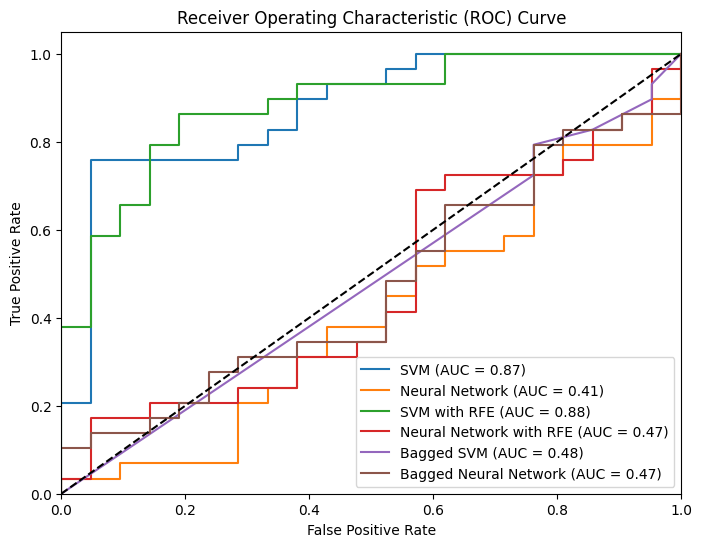

In [ ]:
# Step 4: Construct ROC curves and compare models
print("\nStep 4: Construct ROC curves and compare models")

# SVM ROC curve
svm_probs = svm_best.decision_function(X_test_open_scaled)
svm_fpr, svm_tpr, _ = roc_curve(y_test_open, svm_probs)
svm_roc_auc = auc(svm_fpr, svm_tpr)

# Neural Network ROC curve
nn_probs = nn_best.predict_proba(X_test_open_scaled)
nn_fpr, nn_tpr, _ = roc_curve(y_test_open, nn_probs.max(axis=1))
nn_roc_auc = auc(nn_fpr, nn_tpr)

# SVM with RFE ROC curve
svm_pipeline_probs = svm_pipeline_best.decision_function(X_test_open_scaled)
svm_pipeline_fpr, svm_pipeline_tpr, _ = roc_curve(y_test_open, svm_pipeline_probs)
svm_pipeline_roc_auc = auc(svm_pipeline_fpr, svm_pipeline_tpr)

# Neural Network with RFE ROC curve
nn_pipeline_probs = nn_pipeline_best.predict_proba(X_test_open_scaled)
nn_pipeline_fpr, nn_pipeline_tpr, _ = roc_curve(y_test_open, nn_pipeline_probs.max(axis=1))
nn_pipeline_roc_auc = auc(nn_pipeline_fpr, nn_pipeline_tpr)

# Bagged SVM ROC curve
svm_bagging_probs = svm_bagging_best.predict_proba(X_test_open_scaled)
svm_bagging_fpr, svm_bagging_tpr, _ = roc_curve(y_test_open, svm_bagging_probs.max(axis=1))
svm_bagging_roc_auc = auc(svm_bagging_fpr, svm_bagging_tpr)

# Bagged Neural Network ROC curve
nn_bagging_probs = nn_bagging_best.predict_proba(X_test_open_scaled)
nn_bagging_fpr, nn_bagging_tpr, _ = roc_curve(y_test_open, nn_bagging_probs.max(axis=1))
nn_bagging_roc_auc = auc(nn_bagging_fpr, nn_bagging_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_roc_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_roc_auc:.2f})')
plt.plot(svm_pipeline_fpr, svm_pipeline_tpr, label=f'SVM with RFE (AUC = {svm_pipeline_roc_auc:.2f})')
plt.plot(nn_pipeline_fpr, nn_pipeline_tpr, label=f'Neural Network with RFE (AUC = {nn_pipeline_roc_auc:.2f})')
plt.plot(svm_bagging_fpr, svm_bagging_tpr, label=f'Bagged SVM (AUC = {svm_bagging_roc_auc:.2f})')
plt.plot(nn_bagging_fpr, nn_bagging_tpr, label=f'Bagged Neural Network (AUC = {nn_bagging_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Apply the scaler to the test data
test_closed_data_scaled = scaler.transform(test_closed_data)

# Choose the best SVM model
if svm_pipeline_best.score(X_test_open_scaled, y_test_open) > svm_best.score(X_test_open_scaled, y_test_open):
    best_svm_model = svm_pipeline_best
else:
    best_svm_model = svm_best

# Choose the best Neural Network model
if nn_pipeline_best.score(X_test_open_scaled, y_test_open) > nn_best.score(X_test_open_scaled, y_test_open):
    best_nn_model = nn_pipeline_best
else:
    best_nn_model = nn_best

# Predict on the closed test set
y_pred_svm_closed = best_svm_model.predict(test_closed_data_scaled)
y_pred_nn_closed = best_nn_model.predict(scaler.transform(test_closed_data_scaled))

# Save classification results to files
np.save('Task2_Фамилия_SVM.npy', y_pred_svm_closed)
np.save('Task2_Фамилия_NeuralNetwroks.npy', y_pred_nn_closed)